In [16]:
import pandas as pd
from datetime import datetime, timedelta
import glob, os
import pathlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import tree
from matplotlib import pyplot as plt
import pandas as pd

In [17]:
DF4=pd.read_csv("генерация и потребеление.csv", sep=';')

In [18]:
DF1=pd.read_csv("Доля_высокотехнологичной_продукции_в_валовом_продукте.csv" ,sep=',',names=["Год", "Субъект", "Доля" ])
DF2=pd.read_csv("Потребление_электроэнергии.csv" ,sep=',',names=["Год", "Субъект", "Потребление" ])
DF3=pd.read_csv("Статистика короновируса.csv", sep='\t')


In [19]:
akc=pd.read_csv("MOEXEU_1hour_01012019_28112020.txt",sep=';')
akc.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>
0,MOEXEU,60,27/11/19,0,1924.49,1924.49,1924.49,1924.49,0,0
1,MOEXEU,60,27/11/19,100000,1924.44,1932.88,1923.87,1931.97,0,0
2,MOEXEU,60,27/11/19,110000,1932.03,1934.63,1927.73,1929.99,0,0
3,MOEXEU,60,27/11/19,120000,1929.97,1930.90,1925.28,1928.37,0,0
4,MOEXEU,60,27/11/19,130000,1928.16,1929.05,1927.25,1928.42,0,0


In [20]:
def convert_to_datetime(row):
    d=datetime.strptime(row['M_DATE'], '%d.%m.%Y %H:%M') 
    return d

In [21]:
DF4['Дата'] = DF4.apply(convert_to_datetime, axis=1)

In [22]:
def convert_to_datetime2(row):
    data=datetime.strptime(row['Дата'], '%d.%m.%Y') 
    return data

In [23]:
DF3['Дата'] = DF3.apply(convert_to_datetime2, axis=1)

In [24]:
def convert_to_datetime3(row):
    d=datetime.strptime(row['<DATE>'], '%d/%m/%y') 
    return d

In [25]:
akc['Дата'] = akc.apply(convert_to_datetime3, axis=1)

In [26]:
ack=akc.groupby(['Дата']).agg(['mean'])

In [27]:
DF_energ=DF4.groupby(['Дата','PRICE_ZONE_ID','POWER_SYS_ID']).agg(['sum'])

In [28]:
DF_e=DF4.groupby(['Дата']).agg(['sum'])

In [29]:
Ekon=pd.merge(akc, DF_e, how ='inner', on ='Дата')

AttributeError: 'AxesSubplot' object has no attribute 'fig'

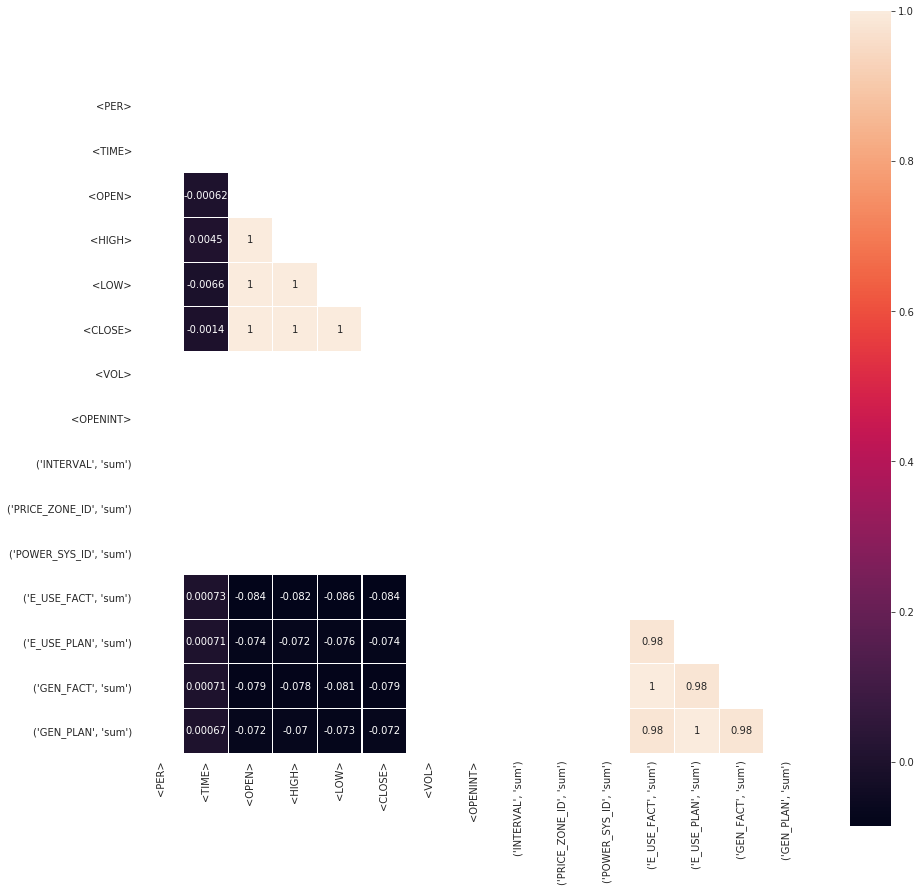

In [31]:
import seaborn as sns
corr = Ekon.corr()
plt.figure(figsize=(15,15))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, cbar=True, annot=True, linewidths=.09)
    ax.fig.set_size_inches(15,15)